Cars that do not qualify for clean alternative fuel vehicle:
          Make        Model                   Electric Vehicle Type  \
6         FORD       FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
7         AUDI         Q5 E  Plug-in Hybrid Electric Vehicle (PHEV)   
8         FORD        C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   
14        FORD        C-MAX  Plug-in Hybrid Electric Vehicle (PHEV)   
15         KIA         NIRO  Plug-in Hybrid Electric Vehicle (PHEV)   
...        ...          ...                                     ...   
130377     BMW         530E  Plug-in Hybrid Electric Vehicle (PHEV)   
130385    AUDI           A3  Plug-in Hybrid Electric Vehicle (PHEV)   
130390    JEEP     WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   
130407  TOYOTA  PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
130437     BMW         530E  Plug-in Hybrid Electric Vehicle (PHEV)   

        DOL Vehicle ID  
6            347508836  
7            227213871  
8          

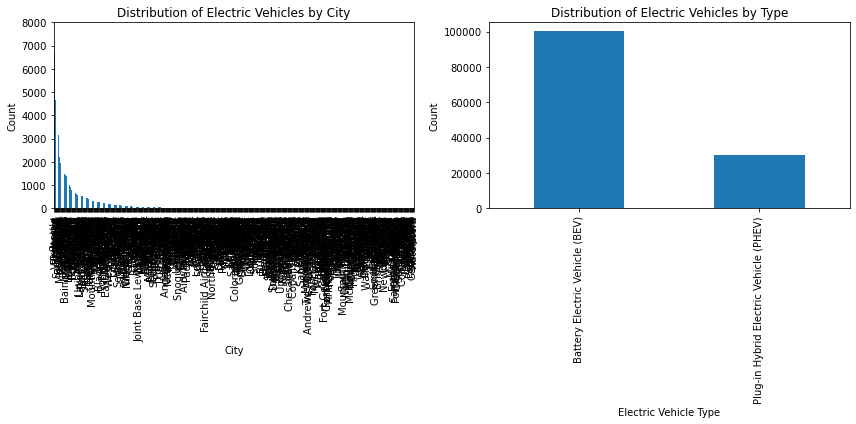

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"

try:
    data = pd.read_csv(url)

    # Insight 1- Get all the cars and their types that do not qualify for clean alternative fuel vehicle
    non_clean_cars = data[data["Clean Alternative Fuel Vehicle (CAFV) Eligibility"] == "Not eligible due to low battery range"]
    non_clean_cars_info = non_clean_cars[["Make", "Model", "Electric Vehicle Type","DOL Vehicle ID"]]
    print("Cars that do not qualify for clean alternative fuel vehicle:")
    print(non_clean_cars_info)

    # Insight 2- Get all TESLA cars with the model year, and model type made in Bothell City
    tesla_cars = data[(data["Make"] == "TESLA") & (data["City"] == "Bothell")]
    tesla_cars_info = tesla_cars[["Model Year", "Model","DOL Vehicle ID"]]
    print("\nTESLA cars made in Bothell City:")
    print(tesla_cars_info)

    # Insight 3- Get all the cars that have an electric range of more than 100, and were made after 2015
    electric_cars = data[(data["Electric Range"] > 100) & (data["Model Year"] > 2015)]
    electric_cars_info = electric_cars[["Make", "Model", "Model Year", "Electric Range","DOL Vehicle ID"]]
    print("\nCars with an electric range of more than 100 and made after 2015:")
    print(electric_cars_info)

    # Insight 4- Draw plots to show the distribution between city and electric vehicle type
    city_count = data["City"].value_counts()
    electric_type_count = data["Electric Vehicle Type"].value_counts()

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    city_count.plot(kind="bar", stacked=True)
    plt.title("Distribution of Electric Vehicles by City")
    plt.xlabel("City")
    plt.ylabel("Count")
    plt.ylim(ymax=8000)  # Set the y-axis upper limit to 8000

    plt.subplot(1, 2, 2)
    electric_type_count.plot(kind="bar")
    plt.title("Distribution of Electric Vehicles by Type")
    plt.xlabel("Electric Vehicle Type")
    plt.ylabel("Count")

    plt.tight_layout()
    plt.show()

except Exception as e:
    print("An error occurred:", str(e))